<a href="https://colab.research.google.com/github/ByeonJuHwan/PythonStudy/blob/main/py25_movielens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Movielens 데이터 셋

* https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/movielens
* movies.data = "MovieID::Title::Genres" 을 컬럼으로 하는 데이터 셋
* ratings.dat : "UserId::MovieId::Rating::Timestamp"을 컬럼으로 하는 데이터 셋. 사용자 정보.

 * movies.dat 파일을 읽고 DataFrame 생성 - `pd.read_csv()`
 * DataFrame 탐색. - `head,tail,info,...`
 * 장르가 'Animation'인 영화는 몇 개? - genres(장르들) 컬럼의 문자열이 'Animation'을 표함.
 * 장르가 로맨틱 코미디인 영화는 몇 개? - genres(장르들) 컬럼의 문자열이 'Comedy' 와 'Romance'를 표함.
 * 어떤 장르의 영화가 가장 많은가? - genres의 문자열을 '|'를 구분자로 분리(split)
 * 연도별 영화 수 - title(제목) 컬럼에 영화 개봉 연도가 포함.

In [50]:
col_names=['Number','Title','Genres']
file_path = 'https://github.com/wesm/pydata-book/raw/3rd-edition/datasets/movielens/movies.dat'
movie = pd.read_csv(file_path, sep='::',names=col_names, engine='python')

In [10]:
movie.head()

,Number,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
Animation = movie['Genres'].str.contains('Animation').sum()
Animation

105

## 장르분석 - 로맨틱 코미디 찾기

In [29]:
two_genres = movie['Genres'].str.contains('Comedy','Romance').sum()
two_genres

1200

## 장르 분석 - 장르들의 빈도수

In [47]:
gen_list = movie.Genres.str.split('|').tolist()
gen_list
dic={}
maxCount=0
cnt = 0
result = ''
for i in gen_list:
    for j in i:
        if dic.get(j)==None:
            dic[j]=1
        else:
            dic[j]+=1
            if dic.get(j)>maxCount:
                maxCount=dic.get(j)
                result=j
result

'Drama'

In [54]:
genres = []
for s in movie.Genres:
    genres.extend(s.split('|')) # 1차원 리스트를 만들기 위해서.


In [55]:
genre_counts = pd.value_counts(genres) # values의 내림차순 정렬.
genre_counts

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Fantasy          68
Western          68
Film-Noir        44
dtype: int64

In [56]:
genre_counts.index[0]

'Drama'

빈도수 상위 7개 시각화

In [59]:
genre_counts.iloc[:7] # 빈도수 상위 7개
genre_top7 = genre_counts.head(n=7)

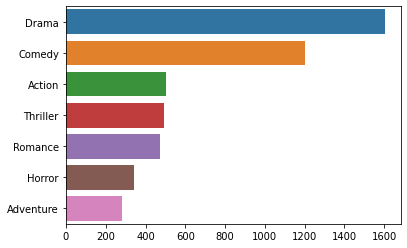

In [61]:
sns.barplot(y=genre_top7.index,x=genre_top7.values)
plt.show()

## 연도별 영화 개수 분석

In [63]:
movie.head()

,Number,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [71]:
# 데이터프레임에 파생변수(새로운 컬럼)을 추가
movie['year']=movie.Title.str[-5:-1].astype('int')
movie.head()

,Number,Title,Genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [74]:
year_counts = movie.year.value_counts()

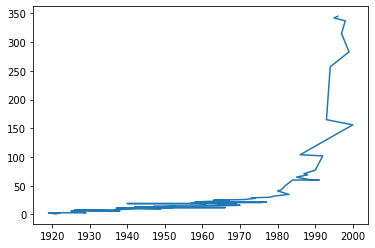